In [ ]:
# Bryan Ochoa July 27 2023 bochoa@lbl.gov

# characterization of piezoelectric displacement using
# data gathered using smaract picoscale interferometer gui, pasting results to a .txt file
# function generator producing a 1kHz Sin function, +10V peak to peak

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy import signal

In [104]:
with open('C:\\Users\\opticslab\\Documents\\Realm Project\\Realms Bochoa\\Piezoelectric Characterization\\Data\\1kHz_10V_Sin.txt', 'r') as file:
    lines = file.readlines()
x = []
y = []

for line in lines:
    values = line.strip().split()
    x.append(float(values[0]))
    y.append(float(values[1]))

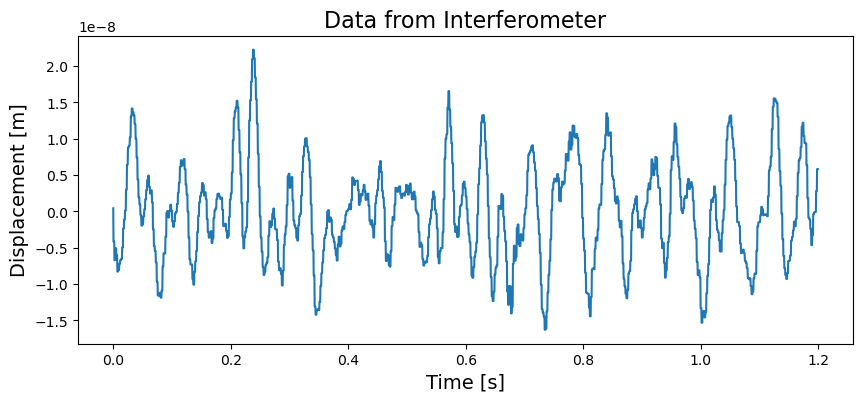

In [105]:

plt.figure(figsize=(10,4))
plt.plot(x,signal.detrend(y))
plt.title("Data from Interferometer", fontsize=16)
plt.xlabel('Time [s]', fontsize=14)
plt.ylabel('Displacement [m]', fontsize=14)
plt.show()

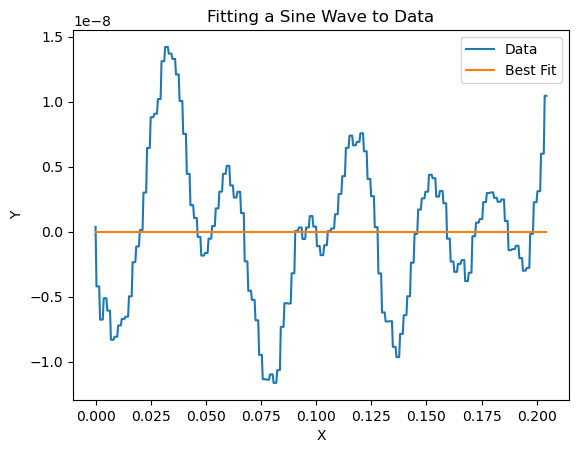

Fitted Amplitude: 8e-08
Fitted Frequency: 0.0
Fitted Phase: 0.0
Fitted Offset: 0.0


In [106]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


xnp = np.array(x[:500])
ynp = np.array(signal.detrend(y[:500]))

# Define the sine wave function to fit
def sine_wave(params, x):
    A, f, phi, offset = params
    return A * np.sin(f * x + phi) + offset

# Define the objective function (mean squared error)
def objective(params):
    y_model = sine_wave(params, xnp)
    return np.mean((ynp - y_model)**2)

# Initial guess for parameters (amplitude, frequency, phase, offset)
p0 = [.00000008, 0, 0.0, 0.0000]

# Use minimize to perform the fitting
result = minimize(objective, p0, method='Trust-Constr')

# Extract the fitted parameters from the optimization result
fit_params = result.x
fit_amplitude, fit_frequency, fit_phase, fit_offset = fit_params

# Generate the best-fitting sine wave based on the found parameters
y_fit = sine_wave(fit_params, xnp)

# Plot the original data and the best-fitting sine wave
plt.plot(xnp, ynp, label='Data')
plt.plot(xnp, y_fit, label='Best Fit')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fitting a Sine Wave to Data')
plt.show()

print("Fitted Amplitude:", fit_amplitude)
print("Fitted Frequency:", fit_frequency)
print("Fitted Phase:", fit_phase)
print("Fitted Offset:", fit_offset)

17
77


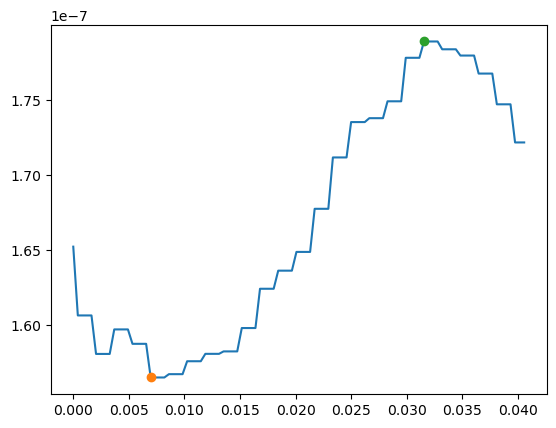

In [114]:
plt.plot(x[:100],y[:100])
print(y.index(min(y[:100])))
print(y.index(max(y[:100])))

plt.plot(x[17],y[17], marker = 'o')
plt.plot(x[77],y[77], marker = 'o')

plt.show()

In [115]:
abs(y[77]) - abs(y[17])


2.2405999999999996e-08

9.966872609295048e-07


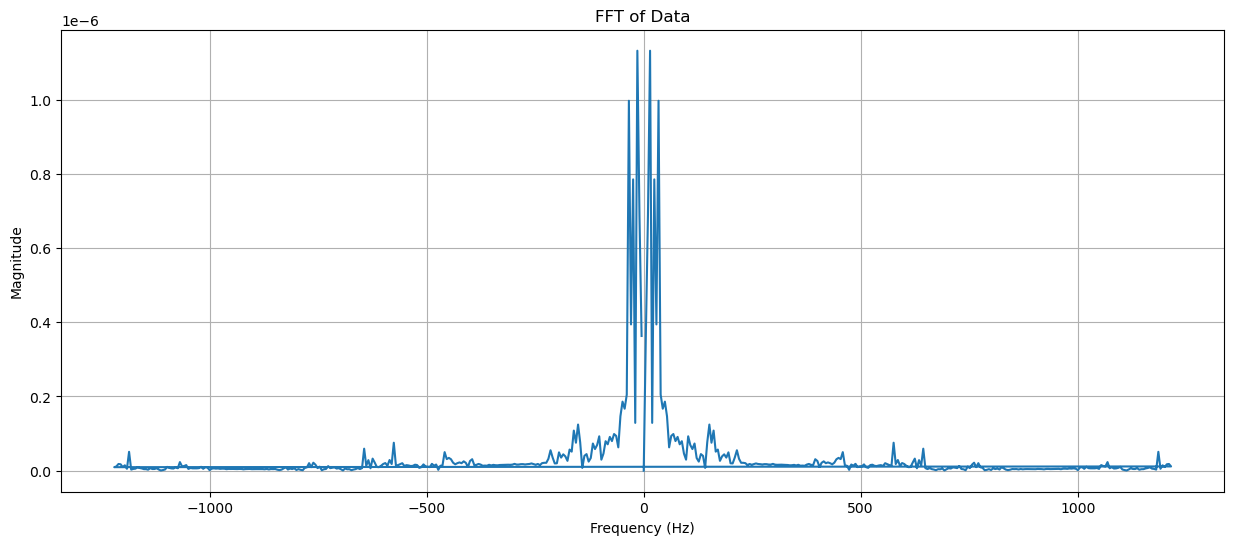

In [160]:
fft_result = np.fft.fft(ynp)
fs = 2440
frequencies = np.fft.fftfreq(len(fft_result), 1/fs)  # Frequency values


print(abs(np.max(fft_result[1:])))

# Plot the FFT magnitude
plt.figure(figsize=(15,6))
plt.plot(frequencies, abs(fft_result))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of Data')
plt.grid(True)
plt.show()

